<a href="https://colab.research.google.com/github/MC-Codingcat/NL-COVID-19-Data-Analysis/blob/main/NL_COVID_19_Analysis_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NL COVID-19 Analysis: Trend**
This project explores time series analysis using the COVID data from RIVM (National Institute for Public Health and the Environment). The data includes dates of report and related timestamps.

Data source: [*RIVM-Covid-19 cumulatieve aantallen per gemeente*](https://data.rivm.nl/meta/srv/api/records/1c0fcd57-1102-4620-9cfa-441e93ea5604).

The data has been cleaned before applying this analysis. The process of dropping empty cells and handling abnormal values is included in the other project - [*NL COVID-19 Analysis: Relevance*](https://colab.research.google.com/github/MC-Codingcat/NL-COVID-19-Data-Analysis/blob/main/NL_COVID_19_Analysis_Relevance.ipynb).
<br><br/>
____
### **Important data descriptions:**
(Also see the explanation here on [*Overheid.nl*](https://data.overheid.nl/en/dataset/11508-covid-19-aantallen-gemeente-cumulatief))
* The Netherlands has reached an endemic phase for the SARS-CoV-2 virus (coronavirus) and the GGD test streets will be closed as of **March 17, 2023**. As a result, the data has not been updated since April 1, 2023.
* As of January 1, 2023, RIVM no longer collected additional information. There has no longer been deaths reported since January 1, 2023. The [Deceased] column has been set to 9999 since **January 1, 2023**.
* The variable 'hospital_admission' has no longer been updated and has been given the value 9999 for records with [Date_of_report] from **January 18, 2022**. For the number of hospital admissions, reference is made to the registered hospital admissions of the [NICE Foundation](https://data.rivm.nl/covid-19/COVID-19_ziekenhuiss.html).

*All '9999' values are modified to 0 during former data cleaning process.*

##**The Imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

#allow reading data files from google drive
from google.colab import drive
drive.mount('/content/drive')

# filter warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


##**Getting the Data**

In [3]:
covid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NL Covid-19 analysis/cumulative-gm.csv',sep=',',header=0)
covid.head()

,Unnamed: 0,Date_of_report,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
0,0,2020-03-13 10:00:00,Appingedam,Groningen,0,0.0,0.0
1,1,2020-03-13 10:00:00,Delfzijl,Groningen,0,0.0,0.0
2,2,2020-03-13 10:00:00,Groningen,Groningen,3,0.0,0.0
3,3,2020-03-13 10:00:00,Loppersum,Groningen,0,0.0,0.0
4,4,2020-03-13 10:00:00,Almere,Flevoland,1,1.0,0.0


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389421 entries, 0 to 389420
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          389421 non-null  int64  
 1   Date_of_report      389421 non-null  object 
 2   Municipality_name   389421 non-null  object 
 3   Province            389421 non-null  object 
 4   Total_reported      389421 non-null  int64  
 5   Hospital_admission  238852 non-null  float64
 6   Deceased            358641 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 20.8+ MB


Currently, the number of reported cases is **_cumulative_** and include some redundant data. For example, there is a column containing the formerly generated index, and there are multiple reported values linked to certain dates.The issues need to be solved otherwise there will be errors during the groupby calculations.

In [5]:
covid.drop(['Unnamed: 0'],axis=1,inplace=True)
covid['Date_of_report'] = pd.to_datetime(covid['Date_of_report'])
cases = covid.set_index(['Date_of_report', 'Municipality_name'])
#There are multiple values reported per day. Use groupby to filter out the final value for each day:
cases = cases.groupby(['Date_of_report','Municipality_name']).max()

Use groupby() to get the cumulative number of cases per province (as data of 342 municipalities is too much for a plot)

In [156]:
prov = cases.reset_index()
prov = prov.groupby(['Province','Date_of_report']).sum().stack(level=0)
prov = prov.unstack(level=0).unstack(level=1)
prov

Province                   Drenthe                                  Flevoland  \
                    Total_reported Hospital_admission Deceased Total_reported   
Date_of_report                                                                  
2020-03-13 10:00:00           13.0                0.0      0.0            7.0   
2020-03-14 10:00:00           15.0                0.0      0.0           14.0   
2020-03-15 10:00:00           15.0                0.0      0.0           19.0   
2020-03-16 10:00:00           16.0                1.0      0.0           22.0   
2020-03-17 10:00:00           17.0                1.0      0.0           24.0   
...                            ...                ...      ...            ...   
2023-03-17 10:00:00       215337.0                0.0      0.0       193967.0   
2023-03-21 10:00:00       215371.0                0.0      0.0       193998.0   
2023-03-24 10:00:00       215392.0                0.0      0.0       194018.0   
2023-03-28 10:00:00       215413.0                0.0      0.0       194039.0   
2023-03-31 10:00:00       215431.0                0.0      0.0       194051.0   

Province                                             Friesland  \
                    Hospital_admission Deceased Total_reported   
Date_of_report                                                   
2020-03-13 10:00:00                3.0      0.0            7.0   
2020-03-14 10:00:00                3.0      0.0            8.0   
2020-03-15 10:00:00                3.0      0.0           10.0   
2020-03-16 10:00:00                5.0      0.0           13.0   
2020-03-17 10:00:00                6.0      0.0           14.0   
...                                ...      ...            ...   
2023-03-17 10:00:00                0.0      0.0            NaN   
2023-03-21 10:00:00                0.0      0.0            NaN   
2023-03-24 10:00:00                0.0      0.0            NaN   
2023-03-28 10:00:00                0.0      0.0            NaN   
2023-03-31 10:00:00                0.0      0.0            NaN   

Province                                               Fryslân  ...  \
                    Hospital_admission Deceased Total_reported  ...   
Date_of_report                                                  ...   
2020-03-13 10:00:00                1.0      0.0            NaN  ...   
2020-03-14 10:00:00                1.0      0.0            NaN  ...   
2020-03-15 10:00:00                1.0      0.0            NaN  ...   
2020-03-16 10:00:00                2.0      0.0            NaN  ...   
2020-03-17 10:00:00                2.0      0.0            NaN  ...   
...                                ...      ...            ...  ...   
2023-03-17 10:00:00                NaN      NaN       292153.0  ...   
2023-03-21 10:00:00                NaN      NaN       292199.0  ...   
2023-03-24 10:00:00                NaN      NaN       292230.0  ...   
2023-03-28 10:00:00                NaN      NaN       292266.0  ...   
2023-03-31 10:00:00                NaN      NaN       292300.0  ...   

Province            Overijssel        Utrecht                              \
                      Deceased Total_reported Hospital_admission Deceased   
Date_of_report                                                              
2020-03-13 10:00:00        0.0           83.0                7.0      0.0   
2020-03-14 10:00:00        1.0           87.0                7.0      0.0   
2020-03-15 10:00:00        0.0          109.0                9.0      0.0   
2020-03-16 10:00:00        0.0          140.0               13.0      0.0   
2020-03-17 10:00:00        0.0          173.0               16.0      0.0   
...                        ...            ...                ...      ...   
2023-03-17 10:00:00        0.0       703726.0                0.0      0.0   
2023-03-21 10:00:00        0.0       703894.0                0.0      0.0   
2023-03-24 10:00:00        0.0       703976.0                0.0      0.0   
2023-03-28 10:00:00  

In [157]:
# Combine the redundant columns 'Friesland' and 'Fryslân'
def sum_columns(row):
    return row['Friesland'] + row['Fryslân']

# Fill all the nan values with 0
prov.fillna(0,inplace=True)
prov['Friesland'] = prov.apply(sum_columns, axis=1)
prov.drop(columns='Fryslân',inplace=True)

In [158]:
prov

Province                   Drenthe                                  Flevoland  \
                    Total_reported Hospital_admission Deceased Total_reported   
Date_of_report                                                                  
2020-03-13 10:00:00           13.0                0.0      0.0            7.0   
2020-03-14 10:00:00           15.0                0.0      0.0           14.0   
2020-03-15 10:00:00           15.0                0.0      0.0           19.0   
2020-03-16 10:00:00           16.0                1.0      0.0           22.0   
2020-03-17 10:00:00           17.0                1.0      0.0           24.0   
...                            ...                ...      ...            ...   
2023-03-17 10:00:00       215337.0                0.0      0.0       193967.0   
2023-03-21 10:00:00       215371.0                0.0      0.0       193998.0   
2023-03-24 10:00:00       215392.0                0.0      0.0       194018.0   
2023-03-28 10:00:00       215413.0                0.0      0.0       194039.0   
2023-03-31 10:00:00       215431.0                0.0      0.0       194051.0   

Province                                             Friesland  \
                    Hospital_admission Deceased Total_reported   
Date_of_report                                                   
2020-03-13 10:00:00                3.0      0.0            7.0   
2020-03-14 10:00:00                3.0      0.0            8.0   
2020-03-15 10:00:00                3.0      0.0           10.0   
2020-03-16 10:00:00                5.0      0.0           13.0   
2020-03-17 10:00:00                6.0      0.0           14.0   
...                                ...      ...            ...   
2023-03-17 10:00:00                0.0      0.0       292153.0   
2023-03-21 10:00:00                0.0      0.0       292199.0   
2023-03-24 10:00:00                0.0      0.0       292230.0   
2023-03-28 10:00:00                0.0      0.0       292266.0   
2023-03-31 10:00:00                0.0      0.0       292300.0   

Province                                            Gelderland  ...  \
                    Hospital_admission Deceased Total_reported  ...   
Date_of_report                                                  ...   
2020-03-13 10:00:00                1.0      0.0           64.0  ...   
2020-03-14 10:00:00                1.0      0.0           76.0  ...   
2020-03-15 10:00:00                1.0      0.0          100.0  ...   
2020-03-16 10:00:00                2.0      0.0          135.0  ...   
2020-03-17 10:00:00                2.0      0.0          173.0  ...   
...                                ...      ...            ...  ...   
2023-03-17 10:00:00                0.0      0.0      1046030.0  ...   
2023-03-21 10:00:00                0.0      0.0      1046213.0  ...   
2023-03-24 10:00:00                0.0      0.0      1046358.0  ...   
2023-03-28 10:00:00                0.0      0.0      1046506.0  ...   
2023-03-31 10:00:00                0.0      0.0      1046608.0  ...   

Province            Overijssel        Utrecht                              \
                      Deceased Total_reported Hospital_admission Deceased   
Date_of_report                                                              
2020-03-13 10:00:00        0.0           83.0                7.0      0.0   
2020-03-14 10:00:00        1.0           87.0                7.0      0.0   
2020-03-15 10:00:00        0.0          109.0                9.0      0.0   
2020-03-16 10:00:00        0.0          140.0               13.0      0.0   
2020-03-17 10:00:00        0.0          173.0               16.0      0.0   
...                        ...            ...                ...      ...   
2023-03-17 10:00:00        0.0       703726.0                0.0      0.0   
2023-03-21 10:00:00        0.0       703894.0                0.0      0.0   
2023-03-24 10:00:00        0.0       703976.0                0.0      0.0   
2023-03-28 10:00:00  

Use diff() to get the daily number of cases per province

In [159]:
daily = prov.diff()
daily

Province                   Drenthe                                  Flevoland  \
                    Total_reported Hospital_admission Deceased Total_reported   
Date_of_report                                                                  
2020-03-13 10:00:00            NaN                NaN      NaN            NaN   
2020-03-14 10:00:00            2.0                0.0      0.0            7.0   
2020-03-15 10:00:00            0.0                0.0      0.0            5.0   
2020-03-16 10:00:00            1.0                1.0      0.0            3.0   
2020-03-17 10:00:00            1.0                0.0      0.0            2.0   
...                            ...                ...      ...            ...   
2023-03-17 10:00:00         -365.0                0.0      0.0           36.0   
2023-03-21 10:00:00           34.0                0.0      0.0           31.0   
2023-03-24 10:00:00           21.0                0.0      0.0           20.0   
2023-03-28 10:00:00           21.0                0.0      0.0           21.0   
2023-03-31 10:00:00           18.0                0.0      0.0           12.0   

Province                                             Friesland  \
                    Hospital_admission Deceased Total_reported   
Date_of_report                                                   
2020-03-13 10:00:00                NaN      NaN            NaN   
2020-03-14 10:00:00                0.0      0.0            1.0   
2020-03-15 10:00:00                0.0      0.0            2.0   
2020-03-16 10:00:00                2.0      0.0            3.0   
2020-03-17 10:00:00                1.0      0.0            1.0   
...                                ...      ...            ...   
2023-03-17 10:00:00                0.0      0.0           57.0   
2023-03-21 10:00:00                0.0      0.0           46.0   
2023-03-24 10:00:00                0.0      0.0           31.0   
2023-03-28 10:00:00                0.0      0.0           36.0   
2023-03-31 10:00:00                0.0      0.0           34.0   

Province                                            Gelderland  ...  \
                    Hospital_admission Deceased Total_reported  ...   
Date_of_report                                                  ...   
2020-03-13 10:00:00                NaN      NaN            NaN  ...   
2020-03-14 10:00:00                0.0      0.0           12.0  ...   
2020-03-15 10:00:00                0.0      0.0           24.0  ...   
2020-03-16 10:00:00                1.0      0.0           35.0  ...   
2020-03-17 10:00:00                0.0      0.0           38.0  ...   
...                                ...      ...            ...  ...   
2023-03-17 10:00:00                0.0      0.0          256.0  ...   
2023-03-21 10:00:00                0.0      0.0          183.0  ...   
2023-03-24 10:00:00                0.0      0.0          145.0  ...   
2023-03-28 10:00:00                0.0      0.0          148.0  ...   
2023-03-31 10:00:00                0.0      0.0          102.0  ...   

Province            Overijssel        Utrecht                              \
                      Deceased Total_reported Hospital_admission Deceased   
Date_of_report                                                              
2020-03-13 10:00:00        NaN            NaN                NaN      NaN   
2020-03-14 10:00:00        1.0            4.0                0.0      0.0   
2020-03-15 10:00:00       -1.0           22.0                2.0      0.0   
2020-03-16 10:00:00        0.0           31.0                4.0      0.0   
2020-03-17 10:00:00        0.0           33.0                3.0      0.0   
...                        ...            ...                ...      ...   
2023-03-17 10:00:00        0.0           87.0                0.0      0.0   
2023-03-21 10:00:00        0.0          168.0                0.0      0.0   
2023-03-24 10:00:00        0.0           82.0                0.0      0.0   
2023-03-28 10:00:00  

##**Analysis & Plots**

###Timelines of the COVID-19 trends:

Text(0.5, 1.0, 'COVID-19 Infections in the Netherlands')

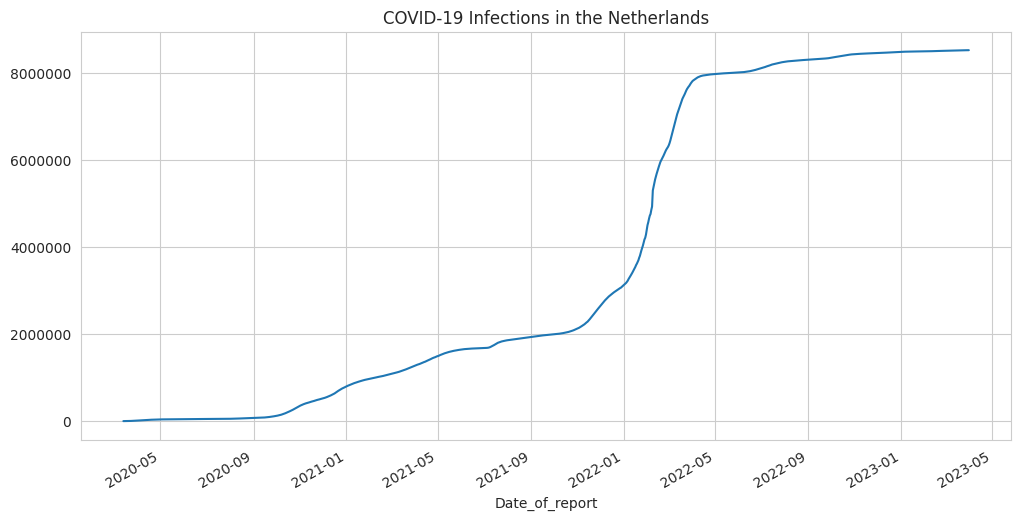

In [261]:
sns.set_style('whitegrid')
cases.groupby('Date_of_report').sum()['Total_reported'].plot(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')
plt.title('COVID-19 Infections in the Netherlands')

Text(0.5, 1.0, 'COVID-19 Hospital Admissions in the Netherlands')

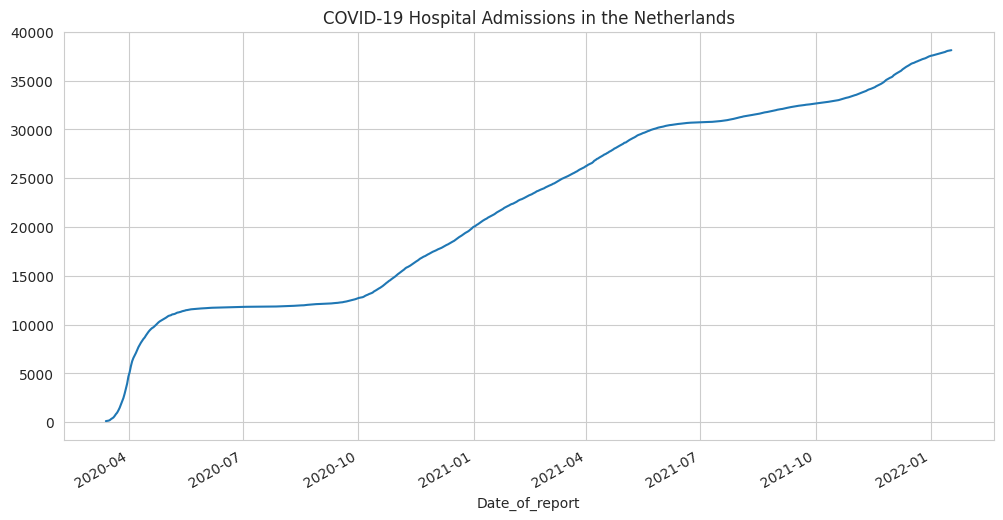

In [262]:
cases.groupby('Date_of_report').sum().loc['2020':'2022-01-17']['Hospital_admission'].plot(figsize=(12,6))
plt.title('COVID-19 Hospital Admissions in the Netherlands')

Text(0.5, 1.0, 'COVID-19 Deaths in the Netherlands')

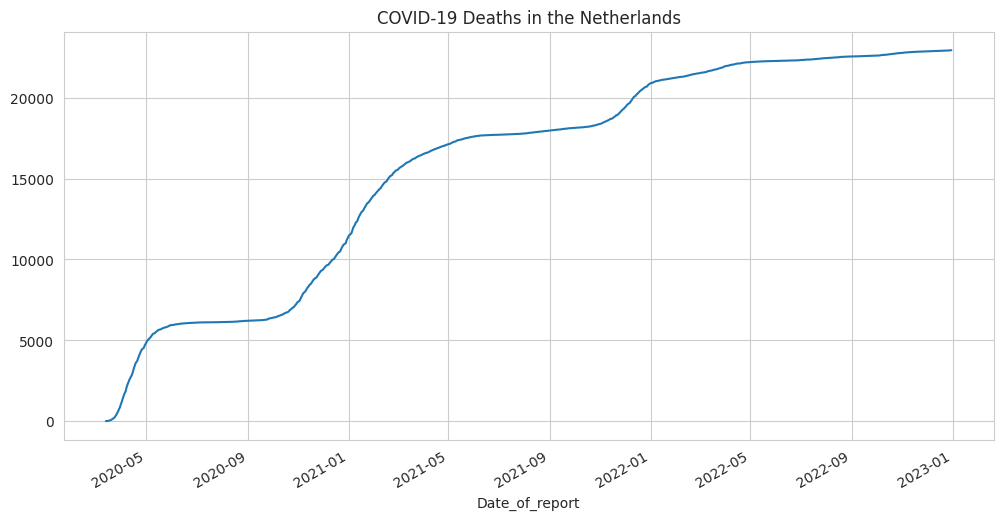

In [263]:
cases.groupby('Date_of_report').sum().loc['2020':'2022']['Deceased'].plot(figsize=(12,6))
plt.title('COVID-19 Deaths in the Netherlands')

###Daily figures

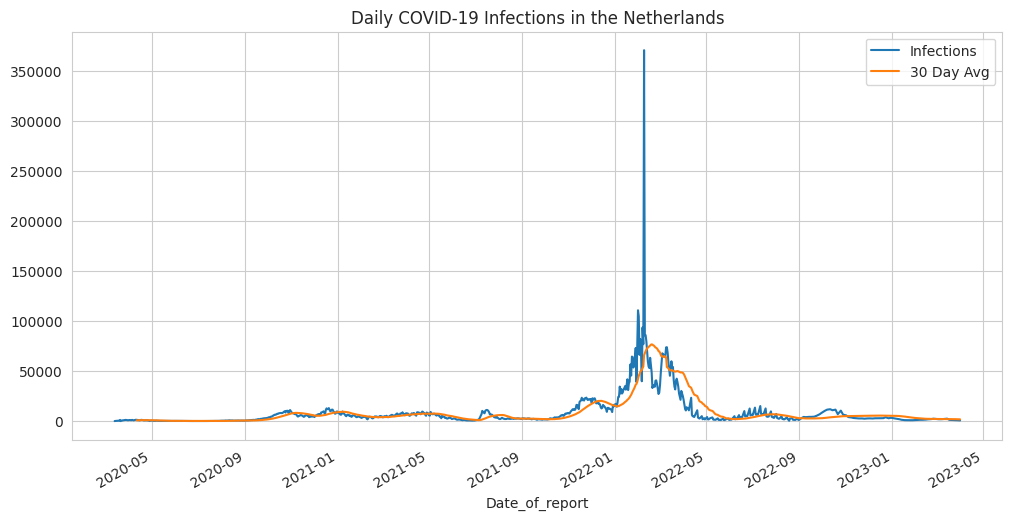

In [288]:
plt.figure(figsize=(12,6))
daily.xs('Total_reported',axis=1,level=1).sum(axis=1).plot(label='Infections')
daily.xs('Total_reported',axis=1,level=1).sum(axis=1).rolling(window=30).mean().plot(label='30 Day Avg')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Daily COVID-19 Infections in the Netherlands')
plt.legend()

In [283]:
daily.xs('Total_reported',axis=1,level=1).idxmax()

Timestamp('2022-02-08 10:00:00')

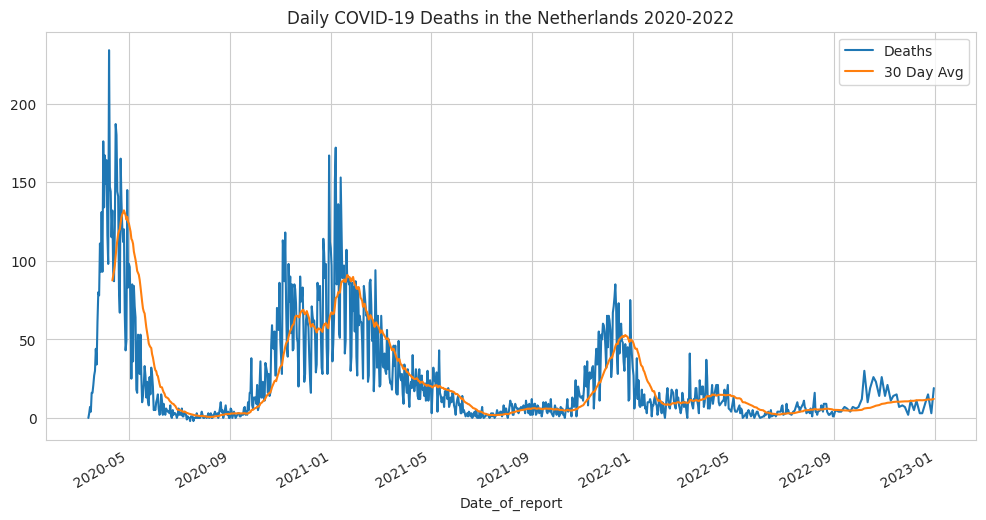

In [298]:
plt.figure(figsize=(12,6))
daily.xs('Deceased',axis=1,level=1).loc['2020':'2022'].sum(axis=1).plot(label='Deaths')
daily.xs('Deceased',axis=1,level=1).loc['2020':'2022'].sum(axis=1).rolling(window=30).mean().plot(label='30 Day Avg')
plt.title('Daily COVID-19 Deaths in the Netherlands 2020-2022')
plt.legend()

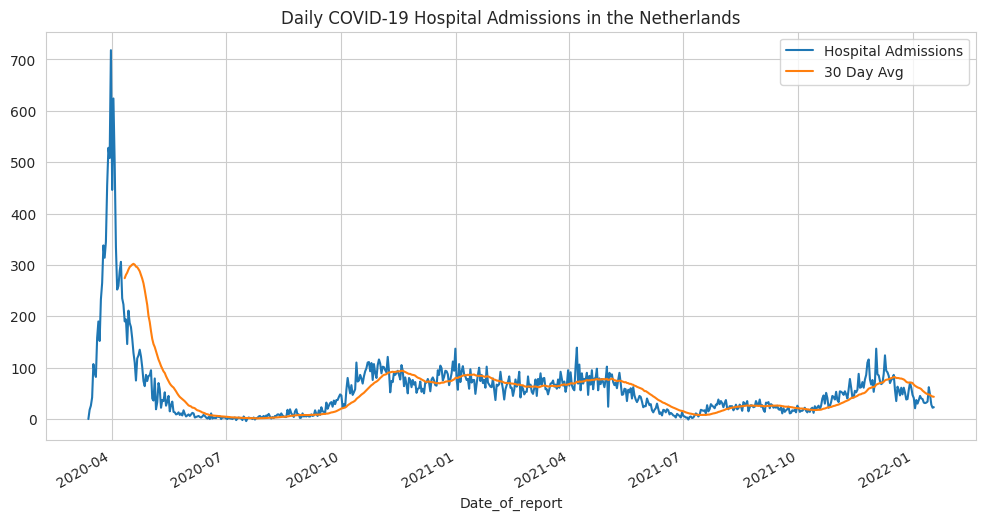

In [291]:
plt.figure(figsize=(12,6))
daily.xs('Hospital_admission',axis=1,level=1).loc['2020':'2022-01-17'].sum(axis=1).plot(label='Hospital Admissions')
daily.xs('Hospital_admission',axis=1,level=1).loc['2020':'2022-01-17'].sum(axis=1).rolling(window=30).mean().plot(label='30 Day Avg')
plt.title('Daily COVID-19 Hospital Admissions in the Netherlands')
plt.legend()

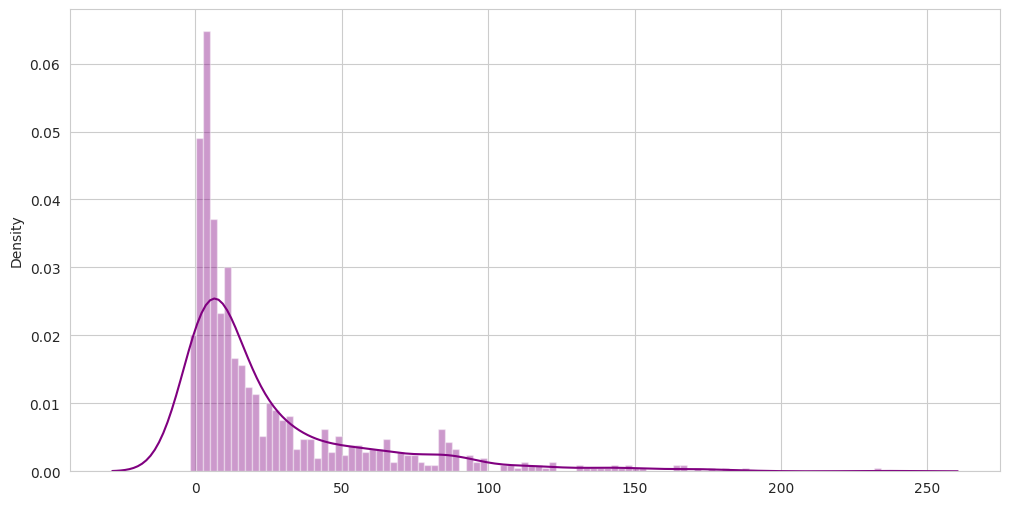

In [370]:
plt.figure(figsize=(12,6))
sns.distplot(daily.xs('Deceased',axis=1,level=1).loc['2020':'2022'].sum(axis=1),color='purple',bins=100)
plt.ticklabel_format(style='plain', axis='y')

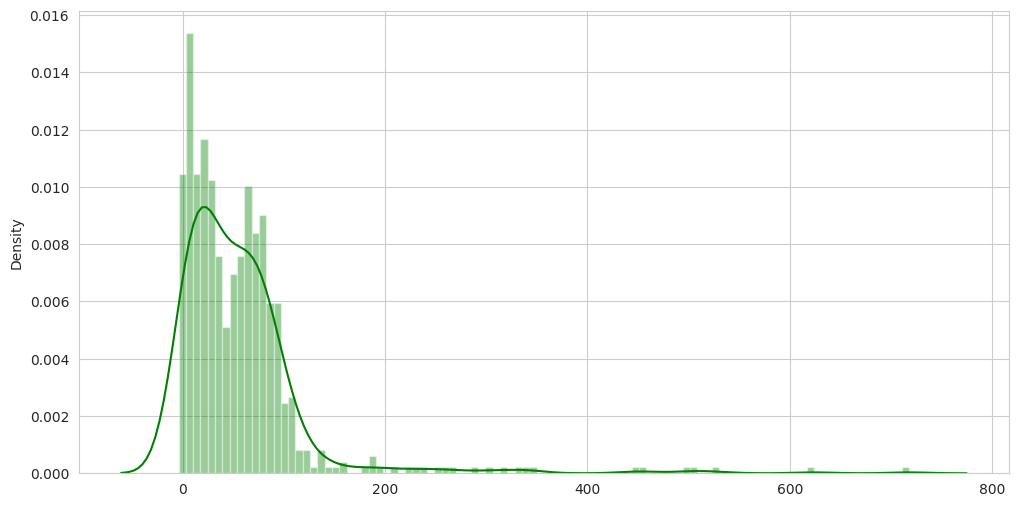

In [364]:
plt.figure(figsize=(12,6))
sns.distplot(daily.xs('Hospital_admission',axis=1,level=1).loc['2020':'2022-01-17'].sum(axis=1),color='green',bins=100)
plt.ticklabel_format(style='plain', axis='y')

In [264]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import cufflinks as cf
cf.go_offline()
pio.renderers.default = 'colab'

daily_reg = daily.stack(level=0).reset_index()
plt.figure(figsize=(12,6))
px.line(daily_reg, x='Date_of_report', y='Total_reported', color='Province')

<Figure size 1200x600 with 0 Axes>

##**Simple Forecast with ARIMA**

In [339]:
from statsmodels.tsa.arima.model import ARIMA

di = daily.xs('Total_reported',axis=1,level=1).loc['2020':'2022'].sum(axis=1)
#di.rename(columns={0:'daily_infections'},inplace=True)
model = ARIMA(di, order=(5,1,0))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



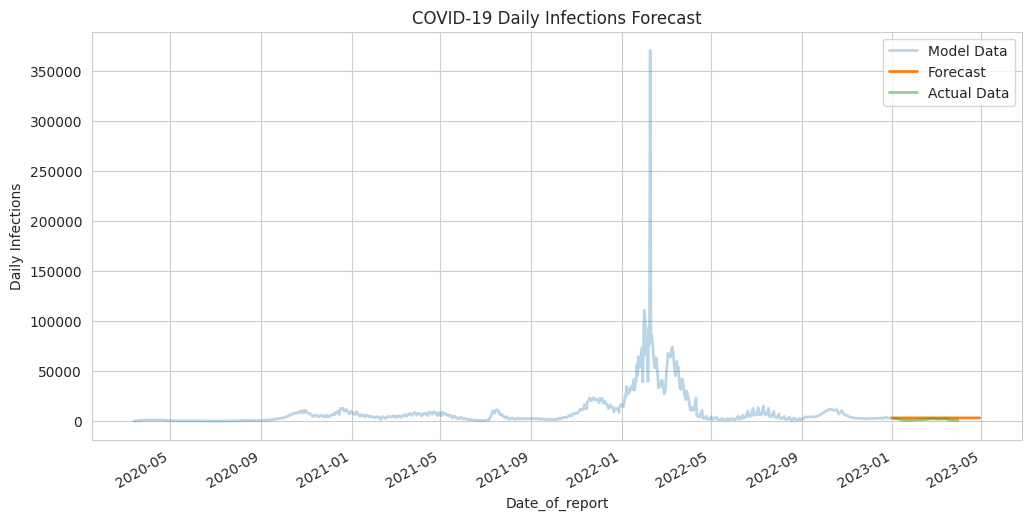

In [353]:
forecast_steps = 120
forecast_index = pd.date_range(start=di.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast = results.get_forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))

plt.plot(di, label='Model Data',alpha=0.3,linewidth=2)
plt.plot(forecast_index, forecast.predicted_mean,label='Forecast',linewidth=2)
daily.xs('Total_reported',axis=1,level=1).loc['2023':].sum(axis=1).plot(label='Actual Data',linewidth=2,alpha=0.5)
plt.title('COVID-19 Daily Infections Forecast')
plt.xlabel('Date_of_report')
plt.ylabel('Daily Infections')
plt.legend()